<a href="https://colab.research.google.com/github/Navneeth08k/NeuralNetworkLearning/blob/main/NumberClassification_to_learn_Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras


In [ ]:
# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

# Print the shapes of the training and test sets
print("Training data shape:", X_train.shape)  # (60000, 28, 28)
print("Test data shape:", X_test.shape)         # (10000, 28, 28)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training data shape: (60000, 28, 28)
Test data shape: (10000, 28, 28)


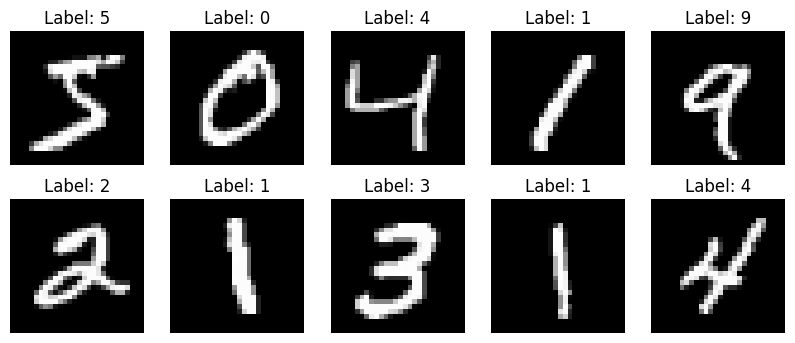

In [ ]:
plt.figure(figsize=(10, 4))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_train[i], cmap='grey')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.show()

In [ ]:
#feed forward network needs a 1D vector, not a 2D image. therefore, image needss to flattened. Just flaten in 28*28 pixels

X_train = X_train.reshape(-1, 28*28)
X_test = X_test.reshape(-1, 28*28)



In [ ]:
X_train = X_train.astype("float32") / 255.0
X_test = X_test.astype("float32") / 255.0



In [ ]:
# Convert labels to one-hot encoding. Search up for later reference. Used for training method in categorical crossentropy
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)



In [ ]:
model = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(784,)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(
    optimizer='adam',             # Adam is an adaptive learning rate optimizer
    loss='categorical_crossentropy',  # Suitable for multi-class classification
    metrics=['accuracy']          # Track accuracy during training and testing
)


In [ ]:
history = model.fit(
    X_train, y_train,
    epochs=10,            # Number of complete passes through the training dataset
    batch_size=32,        # Number of samples per gradient update
    validation_split=0.1  # Reserve 10% of training data for validation
)


Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8652 - loss: 0.4492 - val_accuracy: 0.9693 - val_loss: 0.1074
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9680 - loss: 0.1085 - val_accuracy: 0.9747 - val_loss: 0.0908
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9782 - loss: 0.0709 - val_accuracy: 0.9753 - val_loss: 0.0801
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9835 - loss: 0.0522 - val_accuracy: 0.9738 - val_loss: 0.0873
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9858 - loss: 0.0431 - val_accuracy: 0.9763 - val_loss: 0.0797
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9893 - loss: 0.0324 - val_accuracy: 0.9777 - val_loss: 0.0882
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9919 - loss: 0.0253 - val_accuracy: 0.9812 - val_loss: 0.0708
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9930 - loss: 0.0

In [ ]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9744 - loss: 0.1204
Test Loss: 0.1021, Test Accuracy: 0.9788


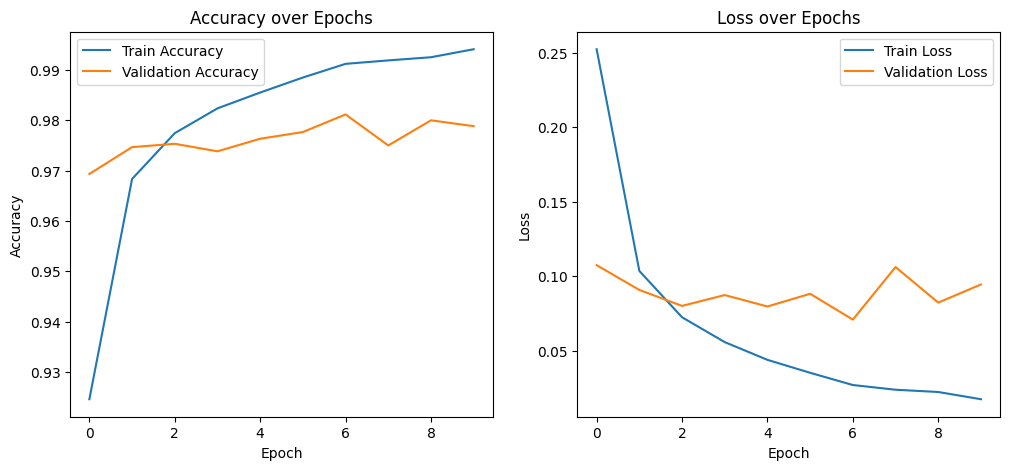

In [ ]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


Learn to flatten images into 1d vectors for processing. One hot encoding basically does this: For 10 numbers, (0 - 9), each element will have its own one hot encoding. [1,0,0,0,0,0,0,0,0,0] would be 1. [0,1,0,0,0,0,0,0,0,0] would be 2. Etc... This will have the model know that that is what each element is. It helps the model converge to a output faster by keeping all inputs on the same kind of scale. A neuron (in training) is just a set of operations. It takes all weights, multiplies by each element, and sums up. It then puts this number into some sort of activator function which for us was ReLU. Often epeople use sigmoid functions for this. ReLu has good and easy computation thats why I used this.